In [810]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [811]:
#To import the dataset:
file_path = 'mushrooms.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

#To find number of rows and column
print
print(df.shape,'\n')

# Display the first few rows of the DataFrame
print(df.head())


(8124, 23) 

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          

In [812]:
#Summary of the dataset 
print ("\n")
print ("Dataset summary:")
print (df.info())




Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk

In [813]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [814]:
#Check missing value
print ("\n")
print ("Check for missing value:")
print (df.isnull () . sum () )



Check for missing value:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


['p' 'e'] 

class
e    4208
p    3916
Name: count, dtype: int64


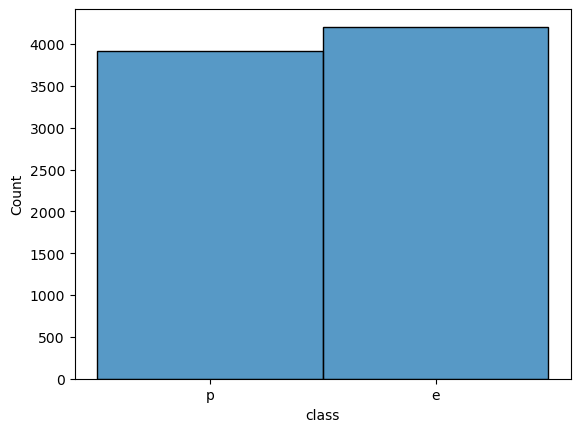

In [815]:
print(df['class'].unique(),'\n')
sns.histplot(df['class'])
print(df['class'].value_counts())

In [816]:
# Preparing data for training and test
# Target is 'class' column.
X = df.drop(["class"], axis=1)
y = df["class"]

In [817]:
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [818]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# y = encoder.fit_transform(y)
# print(y)

In [819]:
# Split data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Check the shape of X train and X test
print("\n")
print("train and test sample size", X_train.shape, X_test.shape)



train and test sample size (7311, 117) (813, 117)


In [820]:
#Import and instantiate the DecisionTreeClassifier model with entropy 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier (criterion='entropy', max_depth=5)

#Fit the decision tree model
dt = dt.fit (X_train, y_train)

print(dt.tree_)


[Text(0.5769230769230769, 0.9166666666666666, 'odor_n <= 0.5\nentropy = 0.999\nsamples = 7311\nvalue = [3775, 3536]\nclass = e'),
 Text(0.38461538461538464, 0.75, 'bruises_f <= 0.5\nentropy = 0.665\nsamples = 4141\nvalue = [717, 3424]\nclass = p'),
 Text(0.3076923076923077, 0.5833333333333334, 'stalk-root_c <= 0.5\nentropy = 0.973\nsamples = 1203\nvalue = [717, 486]\nclass = e'),
 Text(0.23076923076923078, 0.4166666666666667, 'stalk-surface-below-ring_y <= 0.5\nentropy = 0.93\nsamples = 742\nvalue = [256, 486]\nclass = p'),
 Text(0.15384615384615385, 0.25, 'gill-spacing_c <= 0.5\nentropy = 0.611\nsamples = 572\nvalue = [86, 486]\nclass = p'),
 Text(0.07692307692307693, 0.08333333333333333, 'entropy = 0.0\nsamples = 86\nvalue = [86, 0]\nclass = e'),
 Text(0.23076923076923078, 0.08333333333333333, 'entropy = 0.0\nsamples = 486\nvalue = [0, 486]\nclass = p'),
 Text(0.3076923076923077, 0.25, 'entropy = 0.0\nsamples = 170\nvalue = [170, 0]\nclass = e'),
 Text(0.38461538461538464, 0.41666666

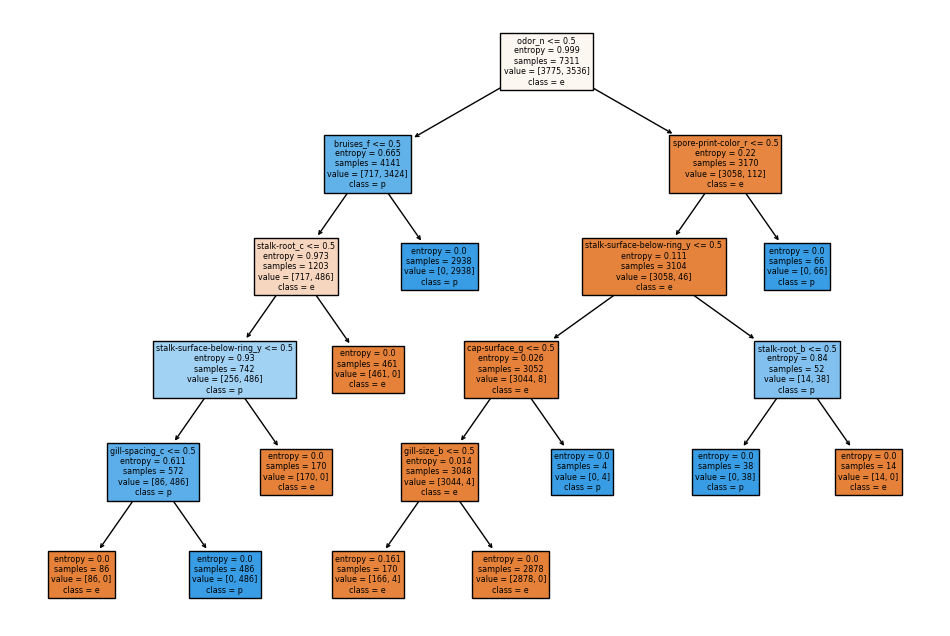

In [821]:
# Let's visualize the decision tree
from sklearn import tree

class_names = ["e", "p"]
plt.figure(figsize=(12,8))
tree.plot_tree(dt, feature_names=X.columns.tolist(), class_names=class_names, filled=True)

# tree.plot_tree(dt)

In [822]:
# Predict the Test set results
y_pred = dt.predict(X_test)

In [823]:
# Creates a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score


cm = confusion_matrix(y_test, y_pred)
print("-----------------------\n")
print(cm)

# # Transform to a DataFrame for easier plotting
# cm_df = pd.DataFrame(cm,
#                      index=["setosa", "versicolor", "virginica"],
#                      columns=["setosa", "versicolor", "virginica"],
# )


# # Print the confusion matrix as a heatmap
# plt.figure(figsize=(5.5, 4))
# sns.heatmap(cm_df, annot=True, fmt="d")  # Use 'fmt="d"' to display integer values
# plt.title(f"Decision Tree with Gini\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")
# plt.ylabel("True label")
# plt.xlabel("Predicted label")
# plt.show()

-----------------------

[[433   0]
 [  0 380]]


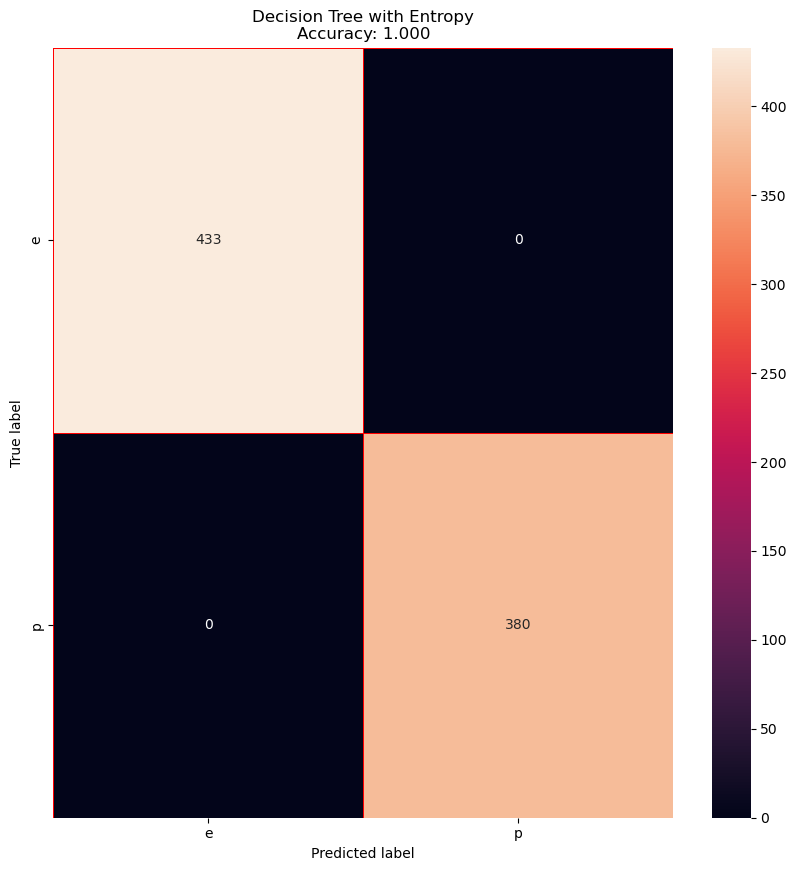

In [824]:
#Transform to df for easier plotting
cm_df = pd.DataFrame (cm,
                      index = ['e', 'p'],
                      columns = ['e', 'p'])

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.title(f"Decision Tree with Entropy\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [825]:
print(classification_report(y_test, y_pred))

# Calculate the F1 score and store it in a different variable
f1 = f1_score(y_test, y_pred, pos_label='e')

# Print the F1 score
print("F1 Score:", f1)


              precision    recall  f1-score   support

           e       1.00      1.00      1.00       433
           p       1.00      1.00      1.00       380

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

F1 Score: 1.0
